In [1]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

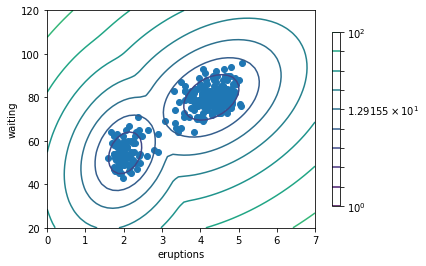

In [4]:
with open('faithful.dat.txt', 'r') as f:
    data = f.readlines()

line = 0
while data[line][0] != '1':
    line += 1

waiting = []
eruptions = []
total = []

for i in range(line, line + 272):
    eruptions.append(float(data[i].split()[-2]))
    waiting.append(int(data[i].split()[-1]))
    total.append([eruptions[-1], waiting[-1]])

plt.figure(3)

gmm = GaussianMixture(n_components=2)
gmm.fit(total)
y = gmm.predict(total)
labels = gmm.predict(total)

weight = gmm.weights_[0]
mean = gmm.means_
cov = gmm.covariances_

x = np.linspace(0, 7)
y = np.linspace(20, 120)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

cluster = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 2, 10))
plt.colorbar(cluster, shrink=0.8, extend='both')
plt.scatter(eruptions, waiting)
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()